In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [2]:
scores = []
year = ['2021', '2022', '2023']
for y in year:
  url = f"https://en.wikipedia.org/wiki/{y}_NCAA_women%27s_gymnastics_tournament"
  response = requests.get(url)
  html_content = response.text
  soup = BeautifulSoup(html_content, 'html.parser')
  text = soup.find_all('table', class_='wikitable')
  if y == '2021':
    text = text[2]
  if y == '2022':
    text = text[18]
  if y == '2023':
    text = text[19]
  rows = text.find_all('td')
  content = []
  for r in rows:
    cont = r.get_text('td', strip=True)
    content.append(cont)
  scores.append(content)

In [3]:
del scores[0][0:7]

In [4]:
del scores[0][60:67]

In [5]:
del scores[0][132:139]

In [6]:
del scores[0][198:205]

In [7]:
del scores[1][0:7]

In [8]:
del scores[1][66:73]

In [9]:
del scores[1][126:133]

In [10]:
del scores[1][204:211]

In [11]:
del scores[2][0:7]

In [12]:
del scores[2][60:67]

In [13]:
del scores[2][114:121]

In [14]:
del scores[2][186:193]

In [15]:
rows = []
for x in scores:
  for i in range(0, len(x), 6):
    row = x[i:i+6]
    rows.append(row)

In [17]:
columns = ['Gymnast', 'Vault', 'Bars', 'Beam', 'Floor', 'All Around']

In [18]:
df = pd.DataFrame(rows, columns=columns)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)
df = df.fillna(0)
for index, row in df.iterrows():
    if row['All Around'] < 30:
        df.at[index, 'All Around'] = 0
years = ['2021'] * 41 + ['2022'] * 44 + ['2023'] * 41
df.insert(0, 'Year', years)
df = df.replace(0, np.nan)
pd.set_option('display.max_rows', None)
df

<ipython-input-18-b22dccebd406>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


,Year,Gymnast,Vault,Bars,Beam,Floor,All Around
0,2021,Sierra Brooks,9.9750,9.9250,9.9625,9.9125,39.7750
1,2021,Natalie Wojcik,9.9375,9.8625,9.9875,9.9500,39.7375
2,2021,Abby Heiskell,9.9750,9.9125,9.9250,9.9125,39.7250
3,2021,Gabby Wilson,9.8875,9.8375,9.7500,9.9375,39.4125
4,2021,Carly Bauman,NaN,9.8625,9.8500,9.8125,NaN
5,2021,Abby Brenner,NaN,9.9250,NaN,NaN,NaN
6,2021,Nicoletta Koulos,NaN,NaN,NaN,9.9125,NaN
7,2021,Reyna Guggino,9.8750,NaN,NaN,NaN,NaN
8,2021,Naomi Morrison,9.8750,NaN,NaN,NaN,NaN
9,2021,Lauren Farley,NaN,NaN,9.7625,NaN,NaN


In [19]:
y21 = df[df['Year'] == '2021']
y22 = df[df['Year'] == '2022']
y23 = df[df['Year'] == '2023']

In [20]:
df.describe()

,Vault,Bars,Beam,Floor,All Around
count,72.000000,72.000000,72.000000,72.000000,28.000000
mean,9.868229,9.870313,9.842639,9.870486,39.520982
std,0.098401,0.184518,0.201624,0.151086,0.296001
min,9.250000,8.450000,9.012500,8.700000,38.312500
25%,9.837500,9.862500,9.850000,9.859375,39.503125
50%,9.875000,9.900000,9.900000,9.900000,39.562500
75%,9.925000,9.925000,9.925000,9.925000,39.687500
max,10.000000,9.975000,10.000000,10.000000,39.862500


In [21]:
y21.describe()

,Vault,Bars,Beam,Floor,All Around
count,24.000000,24.000000,24.000000,24.000000,11.000000
mean,9.886979,9.830208,9.797917,9.897396,39.565909
std,0.059946,0.296123,0.279282,0.041536,0.236649
min,9.800000,8.450000,9.037500,9.812500,38.950000
25%,9.837500,9.862500,9.859375,9.859375,39.493750
50%,9.875000,9.893750,9.900000,9.900000,39.687500
75%,9.937500,9.915625,9.928125,9.928125,39.712500
max,9.987500,9.937500,9.987500,9.962500,39.775000


In [22]:
y22.describe()

,Vault,Bars,Beam,Floor,All Around
count,24.000000,24.000000,24.000000,24.000000,8.000000
mean,9.839583,9.878646,9.881250,9.823958,39.406250
std,0.146038,0.110979,0.046333,0.250432,0.466895
min,9.250000,9.412500,9.787500,8.700000,38.312500
25%,9.809375,9.846875,9.837500,9.843750,39.421875
50%,9.856250,9.900000,9.900000,9.875000,39.543750
75%,9.918750,9.937500,9.903125,9.912500,39.587500
max,9.987500,9.975000,9.962500,10.000000,39.862500


In [23]:
y23.describe()

,Vault,Bars,Beam,Floor,All Around
count,24.000000,24.000000,24.000000,24.000000,9.000000
mean,9.878125,9.902083,9.848750,9.890104,39.568056
std,0.060371,0.047871,0.204121,0.051073,0.128560
min,9.737500,9.800000,9.012500,9.725000,39.287500
25%,9.837500,9.875000,9.850000,9.875000,39.537500
50%,9.887500,9.918750,9.900000,9.900000,39.562500
75%,9.900000,9.928125,9.928125,9.925000,39.675000
max,10.000000,9.975000,10.000000,9.950000,39.725000


In [25]:
df.sort_values(by='All Around', ascending=False)

,Year,Gymnast,Vault,Bars,Beam,Floor,All Around
52,2022,Trinity Thomas,9.9875,9.9750,9.9000,10.0000,39.8625
0,2021,Sierra Brooks,9.9750,9.9250,9.9625,9.9125,39.7750
1,2021,Natalie Wojcik,9.9375,9.8625,9.9875,9.9500,39.7375
2,2021,Abby Heiskell,9.9750,9.9125,9.9250,9.9125,39.7250
119,2023,Haleigh Bryant,9.9875,9.9500,9.8500,9.9375,39.7250
10,2021,Anastasia Webb,9.8750,9.9375,9.9250,9.9625,39.7000
11,2021,Olivia Trautman,9.9625,9.9125,9.8750,9.9375,39.6875
22,2021,Maile O'Keefe,9.8375,9.9375,9.9875,9.9250,39.6875
85,2023,Jordan Bowers,9.9000,9.9250,9.9125,9.9500,39.6875
97,2023,Kayla Dicello,9.9000,9.9750,9.9000,9.9000,39.6750


In [30]:
medians = df.drop('Gymnast', axis=1).drop('All Around', axis=1).groupby('Year').median()
medians

,Vault,Bars,Beam,Floor
Year,,,,
2021,9.87500,9.89375,9.9,9.900
2022,9.85625,9.90000,9.9,9.875
2023,9.88750,9.91875,9.9,9.900


In [31]:
df_meds = medians.transpose()
df_meds

Year,2021,2022,2023
Vault,9.87500,9.85625,9.88750
Bars,9.89375,9.90000,9.91875
Beam,9.90000,9.90000,9.90000
Floor,9.90000,9.87500,9.90000


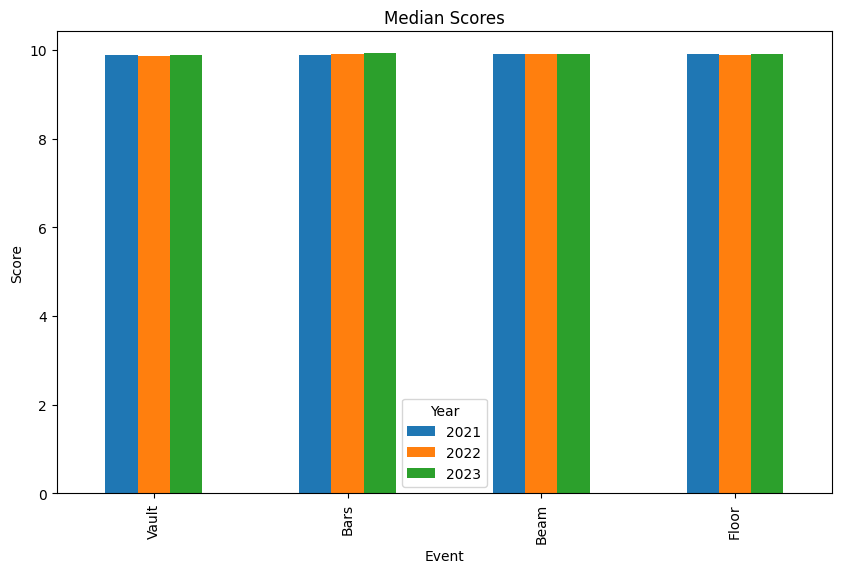

In [32]:
ax = df_meds.plot.bar(figsize=(10, 6))
ax.set_xlabel('Event')
ax.set_ylabel('Score')
ax.set_title('Median Scores')
plt.show()

In [33]:
f_oneway(df_meds['2021'], df_meds['2022'], df_meds['2023'])

F_onewayResult(statistic=np.float64(1.3905579399140948), pvalue=np.float64(0.29768185790292045))

In [2]:
views21 = 808000
views22 = 922000
views23 = 1020000

In [38]:
increase12 = ((views22 - views21) / views21)
increase12

0.14108910891089108

In [39]:
increase23 = ((views23 - views22) / views22)
increase23

0.10629067245119306

In [60]:
med21 = y21.drop(['Gymnast', 'All Around', 'Year'], axis=1)
med21 = med21.to_numpy().flatten()
med21 = med21[~np.isnan(med21)]
med21 = np.median(med21)
med21

np.float64(9.89375)

In [61]:
med22 = y22.drop(['Gymnast', 'All Around', 'Year'], axis=1)
med22 = med22.to_numpy().flatten()
med22 = med22[~np.isnan(med22)]
med22 = np.median(med22)
med22

np.float64(9.8875)

In [62]:
med23 = y23.drop(['Gymnast', 'All Around', 'Year'], axis=1)
med23 = med23.to_numpy().flatten()
med23 = med23[~np.isnan(med23)]
med23 = np.median(med23)
med23

np.float64(9.9)

In [66]:
medincrease12 = ((med22 - med21) / med21)
medincrease12

np.float64(-0.0006317119393557974)

In [67]:
medincrease23 = ((med23 - med22) / med22)
medincrease23

np.float64(0.0012642225031606641)

In [10]:
data = {
    'Year': [2021, 2022, 2023],
    'Views': [views21, views22, views23]
}
viewsdf = pd.DataFrame(data)
viewsdf.set_index('Year', inplace=True)
viewsdf

,Views
Year,
2021,808000
2022,922000
2023,1020000


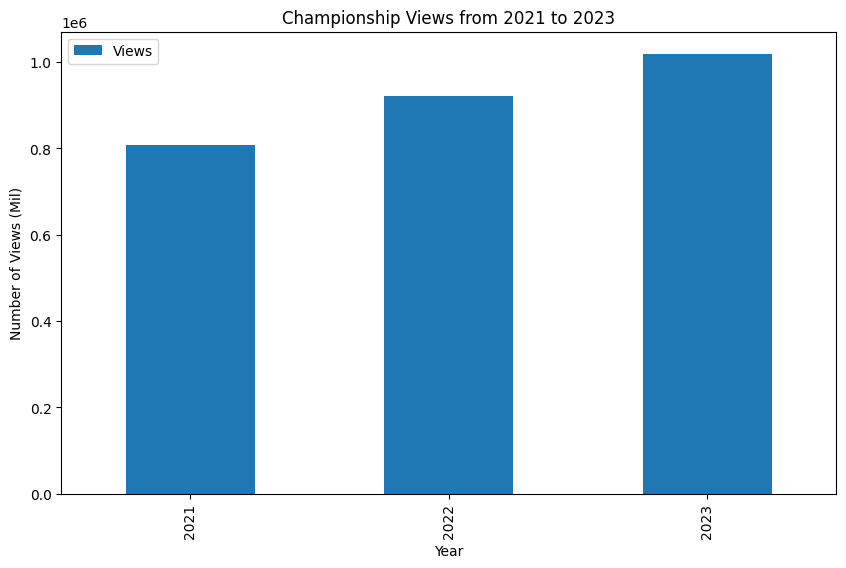

In [11]:
ax = viewsdf.plot.bar(figsize=(10, 6))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Views (Mil)')
ax.set_title('Championship Views from 2021 to 2023')
plt.show()